## Marthi et al. 2020

type: <class 'numpy.ndarray'>	shape: (128, 200), type: <class 'numpy.ndarray'>	shape: (255, 399)
type: <class 'numpy.ndarray'>	shape: (128, 200), type: <class 'numpy.ndarray'>	shape: (255, 399)
type: <class 'numpy.ndarray'>	shape: (128, 200), type: <class 'numpy.ndarray'>	shape: (255, 399)


<ipython-input-2-4d1ff1ba89a9>:53: UserWarning: No contour levels were found within the data range.
  plt.contour(fitmap, [popt[0]/4, popt[0]*0.9], colors='b', alpha=0.75, extent=corrextents, origin='lower')


type: <class 'numpy.ndarray'>	shape: (128, 200), type: <class 'numpy.ndarray'>	shape: (255, 399)
type: <class 'numpy.ndarray'>	shape: (128, 200), type: <class 'numpy.ndarray'>	shape: (255, 399)
type: <class 'numpy.ndarray'>	shape: (128, 200), type: <class 'numpy.ndarray'>	shape: (255, 399)
type: <class 'numpy.ndarray'>	shape: (128, 200), type: <class 'numpy.ndarray'>	shape: (255, 399)
type: <class 'numpy.ndarray'>	shape: (128, 200), type: <class 'numpy.ndarray'>	shape: (255, 399)
type: <class 'numpy.ndarray'>	shape: (128, 200), type: <class 'numpy.ndarray'>	shape: (255, 399)
type: <class 'numpy.ndarray'>	shape: (128, 200), type: <class 'numpy.ndarray'>	shape: (255, 399)


B:\dev\frbrepeaters\driftrate.py:47: RuntimeWarning: invalid value encountered in sqrt
  width_x = np.sqrt(abs((np.arange(col.size)-y)**2*col).sum()/col.sum())
C:\Users\hmsmo\AppData\Roaming\Python\Python38\site-packages\scipy\optimize\minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
C:\Users\hmsmo\AppData\Roaming\Python\Python38\site-packages\matplotlib\contour.py:1494: UserWarning: Warning: converting a masked element to nan.
  self.zmax = float(z.max())
C:\Users\hmsmo\AppData\Roaming\Python\Python38\site-packages\matplotlib\contour.py:1495: UserWarning: Warning: converting a masked element to nan.
  self.zmin = float(z.min())


type: <class 'numpy.ndarray'>	shape: (128, 200), type: <class 'numpy.ndarray'>	shape: (255, 399)
type: <class 'numpy.ndarray'>	shape: (128, 200), type: <class 'numpy.ndarray'>	shape: (255, 399)


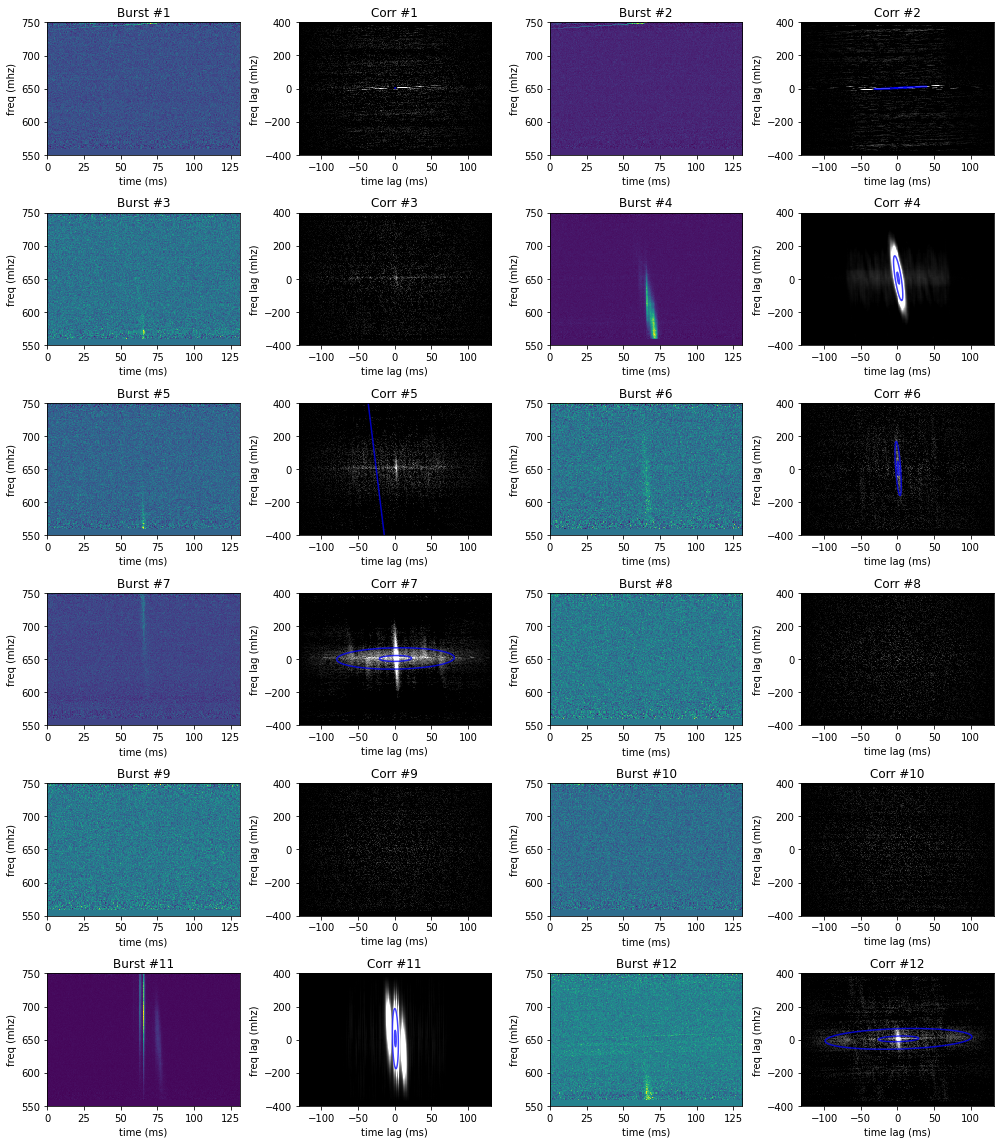

In [2]:
import os, glob, itertools
import numpy as np
import matplotlib.pyplot as plt
import pypulse, your
import driftrate, driftlaw
import frbrepeaters

# %matplotlib qt
%matplotlib inline

DM = 348.82       # pc/cm3
bwidth = 200   # mhz
df = bwidth / 2048   # mhz
dt = 327.68          # us
dt = 0.32768          # ms
lowest_freq = 550 # mhz

plt.figure(figsize=(14,16))
nrows, ncols = 6, 4
ploti = itertools.count(start=1, step=1)
burstnum = 1

for filename in glob.glob('data/marthi2020/DDTC123_24Mar2020/*.npy'):
    # print(f'loading {filename}')
    wfall = np.transpose(np.load(filename))
    wfall[:100] = 0
    wfall[2036:] = 0
    
    nfreq = 128
    tfac = 2
    wfall = driftrate.subsample(wfall, nfreq, wfall.shape[1]//tfac)
    wfall = driftrate.subtractbg(wfall, tleft=0, tright=100)
    ts = np.nanmean(wfall, axis=0)
    pkidx = np.nanargmax(ts)
   
    view = wfall[..., pkidx-100:pkidx+100]
    corr = driftrate.autocorr2d(view)
    print(f'type: {type(view)}\tshape: {view.shape}, type: {type(corr)}\tshape: {corr.shape}')
    drift, drift_error, popt, perr, theta, red_chisq, center_f, fitmap = driftrate.processBurst(view, bwidth/nfreq, dt*tfac, lowest_freq, verbose=False)
    extents, corrextents = driftrate.getExtents(view, df=bwidth/nfreq, dt=dt*tfac, lowest_freq=lowest_freq)

    plt.subplot(nrows, ncols, next(ploti))
    plt.imshow(view, origin='lower', interpolation='none', aspect='auto', extent=extents)
    plt.title(f'Burst #{burstnum}')
    plt.xlabel('time (ms)'), plt.ylabel('freq (mhz)')
    
    plt.subplot(nrows, ncols, next(ploti))
    plt.imshow(corr, origin='lower', interpolation='none', aspect='auto', extent=corrextents, cmap='gray')
    plt.clim(0, np.max(corr)/20)
    plt.title(f'Corr #{burstnum}')
    plt.xlabel('time lag (ms)'), plt.ylabel('freq lag (mhz)')
    if popt[0] > 0:
        plt.contour(fitmap, [popt[0]/4, popt[0]*0.9], colors='b', alpha=0.75, extent=corrextents, origin='lower')

    burstnum += 1

plt.tight_layout()
# plt.savefig('MarthiBursts.pdf')
plt.show()


## Oostrum et al. 2020

<ipython-input-2-2d84867b63f3>:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(15,4))


Loading: data/oostrum2020/R1_frb121102\R1_B30.rf
Load time: 4.20 s


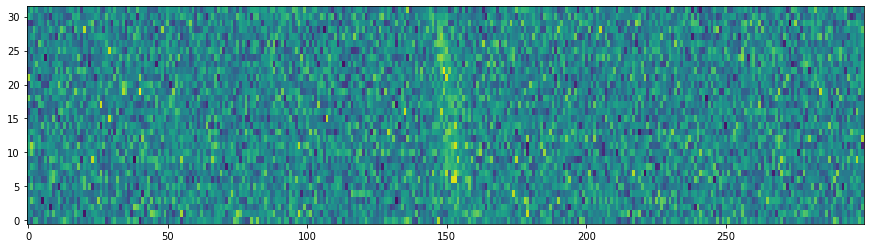

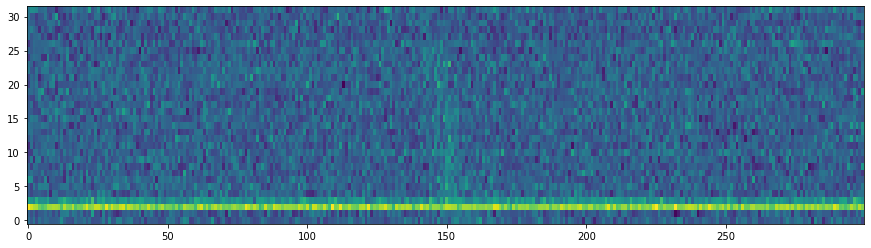

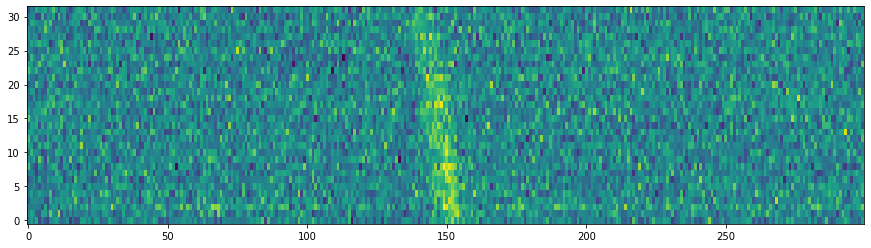

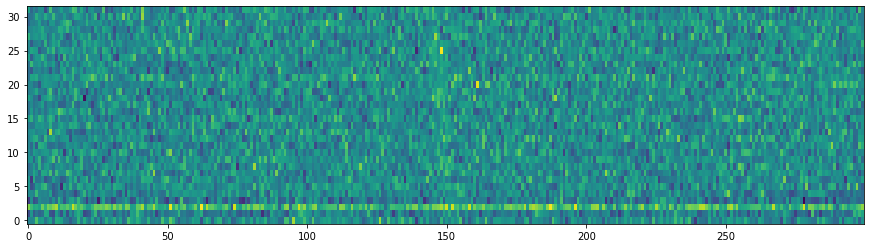

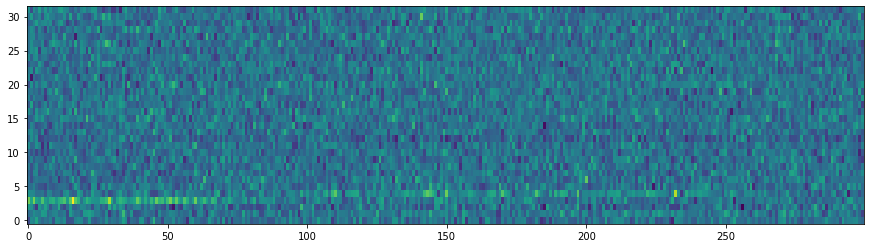

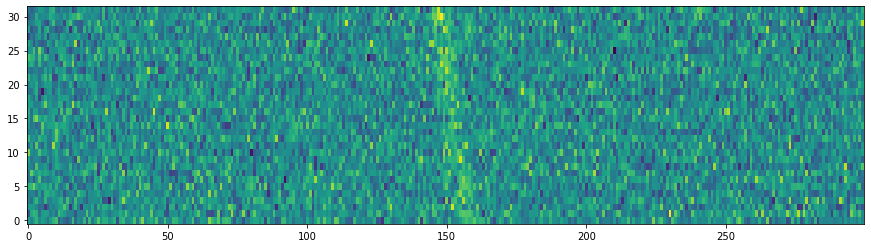

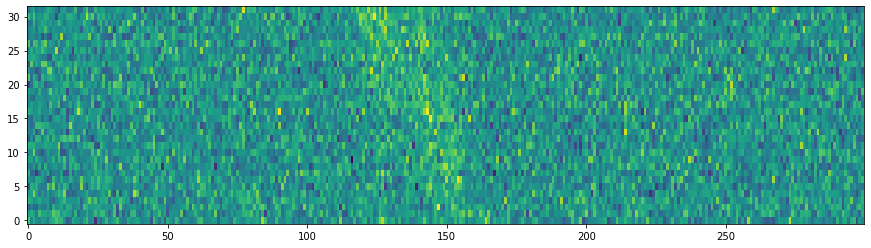

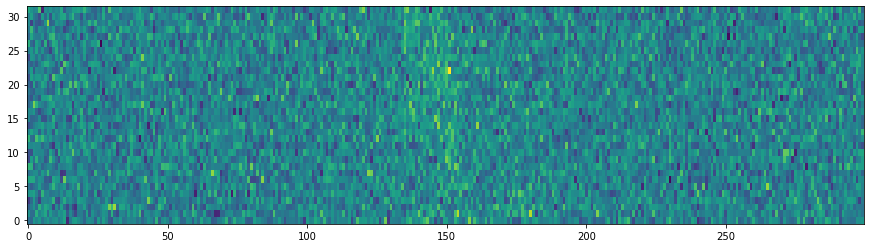

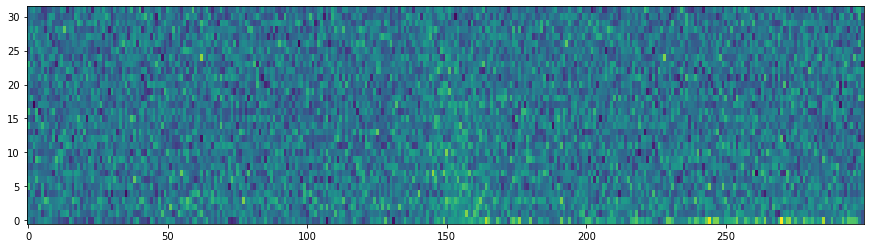

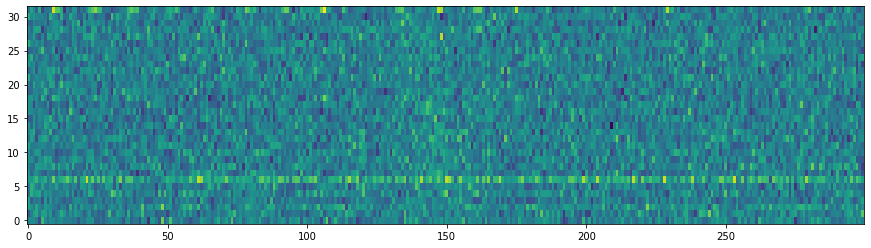

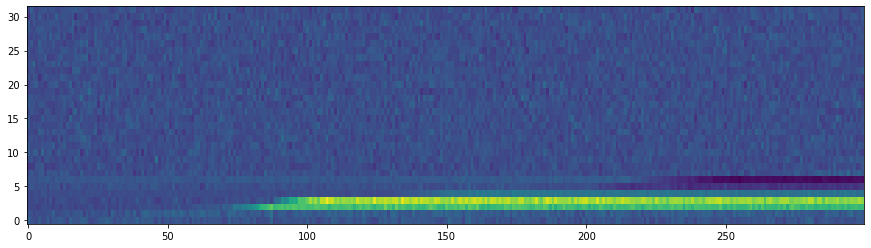

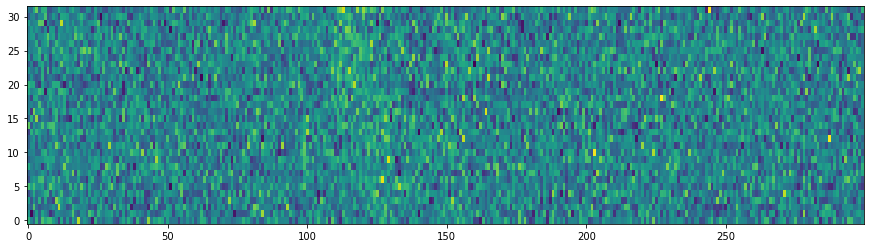

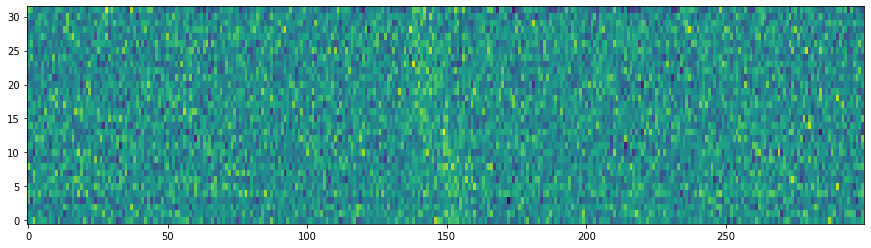

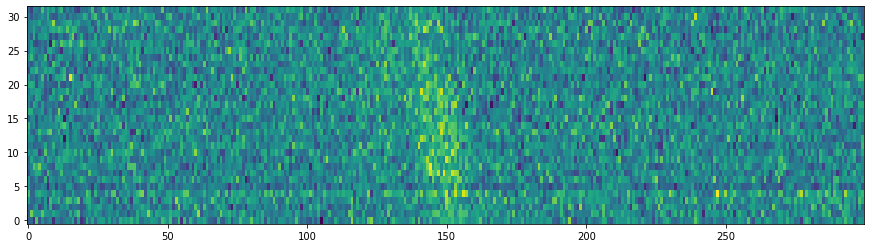

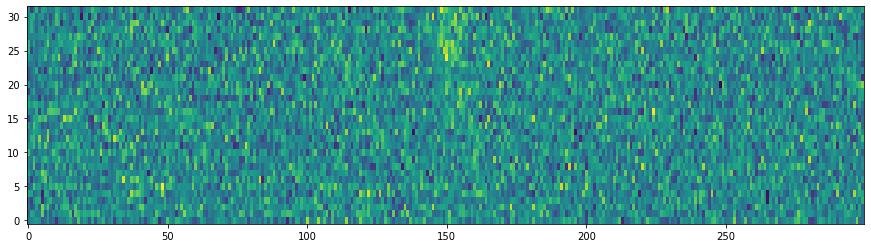

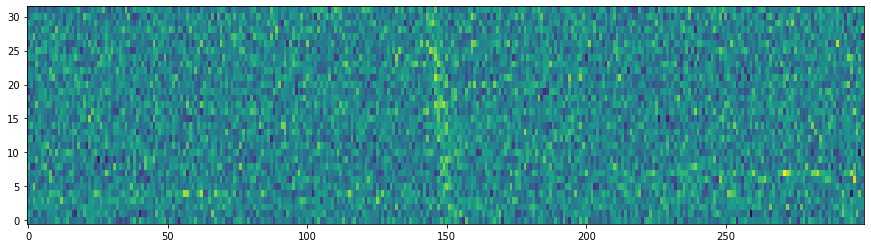

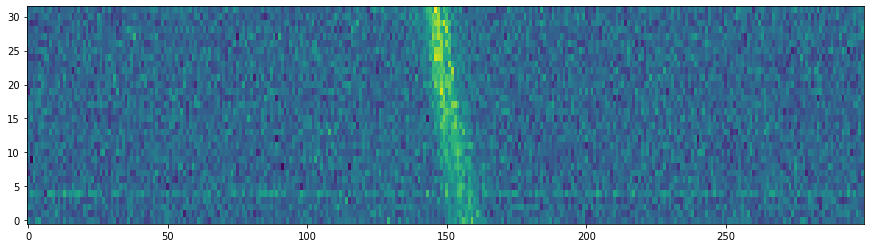

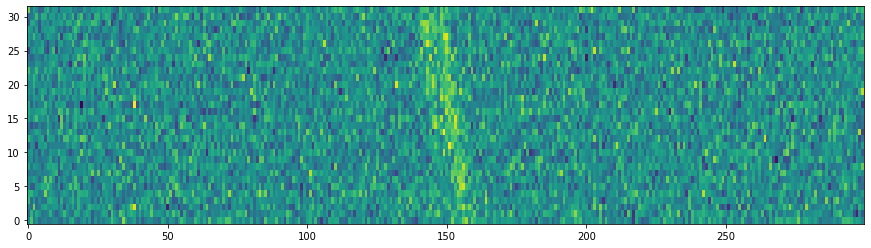

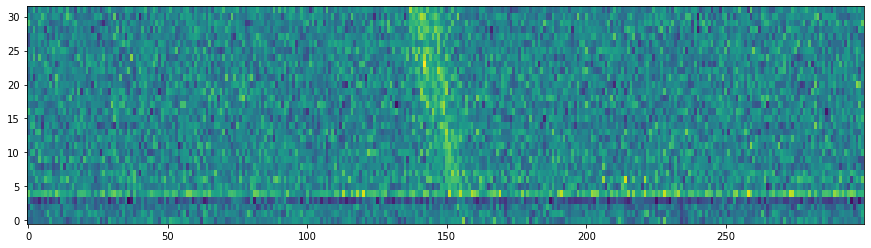

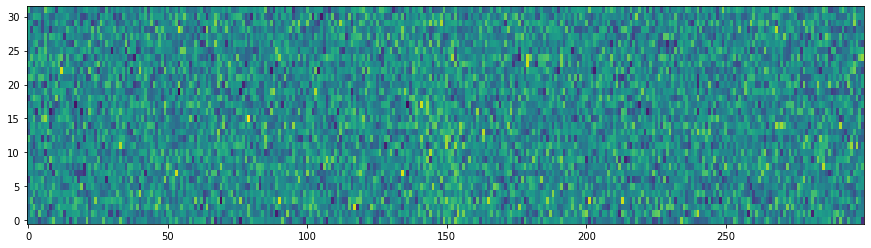

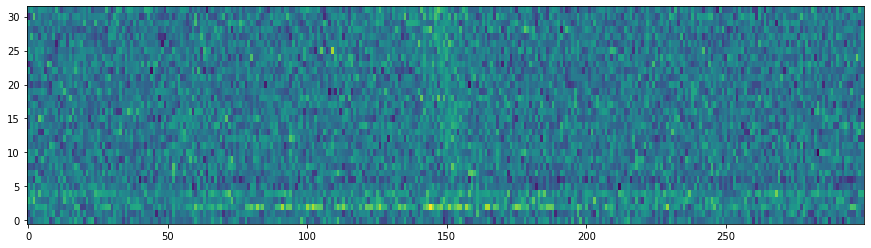

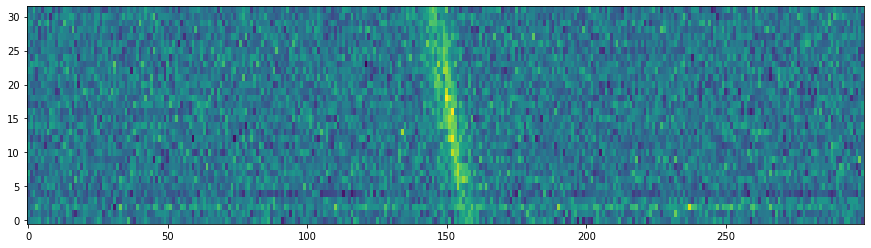

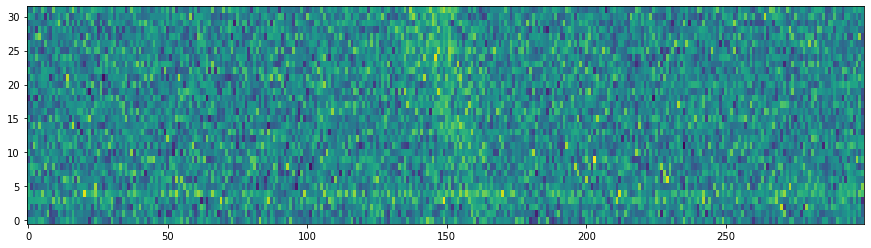

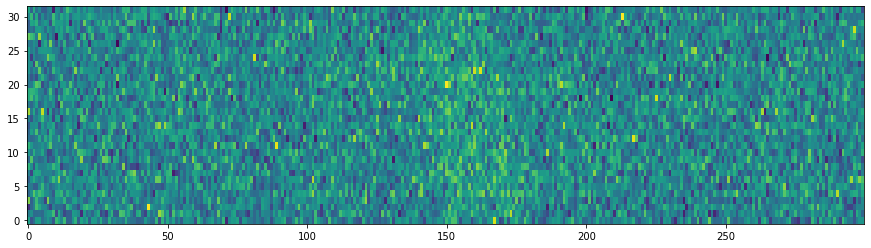

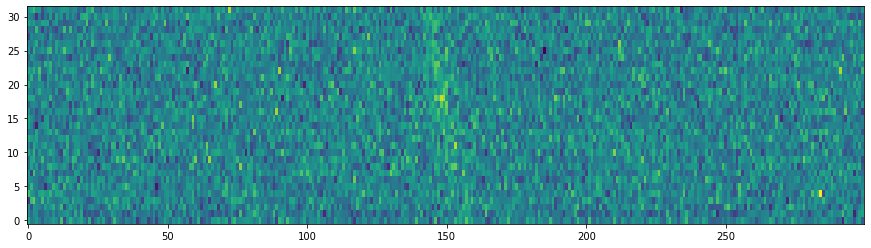

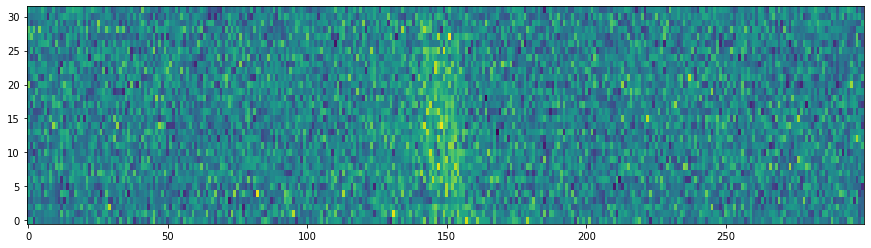

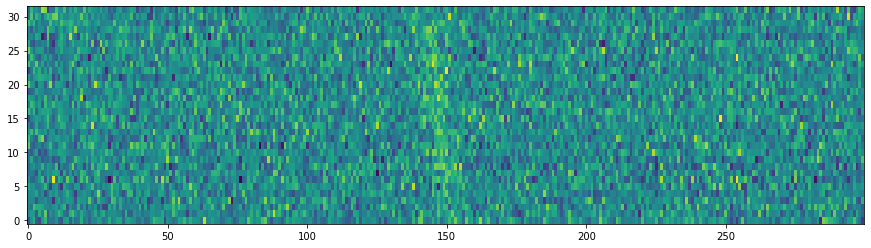

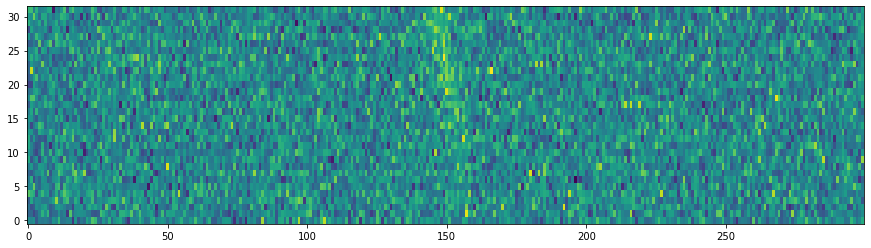

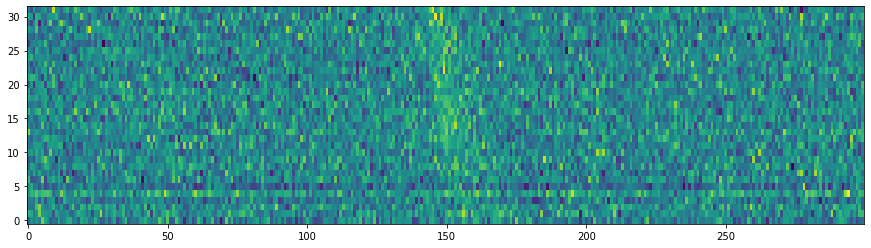

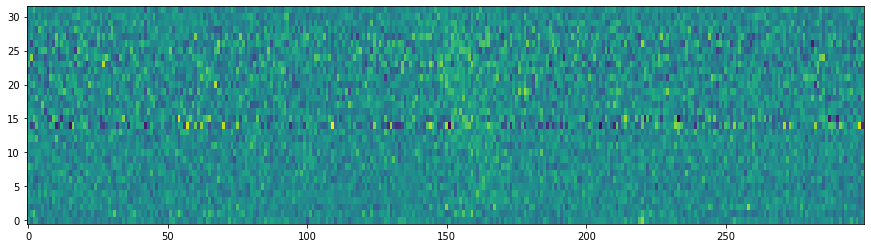

In [2]:
#filename = 'data/oostrum2020/R1_frb121102/R1_B01.rf'
for filename in glob.glob('data/oostrum2020/R1_frb121102/*.rf'):
    #filename = 'data/oostrum2020/R1_frb121102/R1_B01.rf'

    subfall, pkidx = frbrepeaters.loadpsrfits(filename)
    width = 150
    plt.figure(figsize=(15,4))
    plt.imshow(subfall[:, pkidx-width:pkidx+width], origin='lower', interpolation='none', aspect='auto')